In [48]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [49]:
df = pd.read_csv('Mall_customers.csv')

In [50]:
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [51]:
df.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [65]:
X = df.iloc[:,[3,4]].values

In [61]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method')

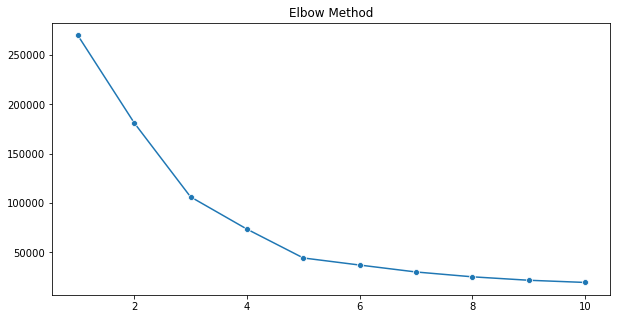

In [62]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1,11),wcss, marker='o')
plt.title('Elbow Method')

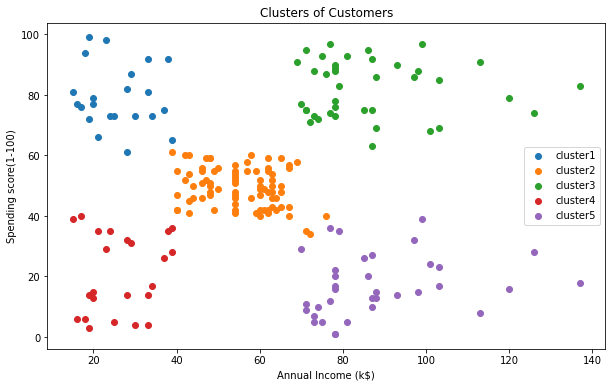

In [64]:
kmeans=KMeans(n_clusters = 5, init = 'k-means++', random_state = 42) 
y_pred=kmeans.fit_predict(X)
plt.figure(figsize=(10,6))
for i in range(5):
    plt.scatter(X[y_pred==i,0], X[y_pred==i,1], label='cluster'+str(i+1))
    plt.legend()
plt.grid(False)
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending score(1-100)')
plt.show()